<a href="https://colab.research.google.com/github/leynessa/ds_projects/blob/main/basic_Classifier_python_and_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic Dataset**

Using the Most popular classifiers on the titanic dataset to predict Survival

##**Preprocessing**

Preprocessing is typically done before splitting the data into training and test sets. The reason for this is to avoid data leakage, which occurs when information from the test set inadvertently influences the preprocessing steps applied to the training set.<br>

The correct order of steps is as follows:<br>

**Preprocessing**: Clean, transform, and preprocess the entire dataset (features and target variable) as needed. This may include handling missing values, scaling/normalizing features, encoding categorical variables, and dealing with outliers.<br>

**Splitting**: After preprocessing, the dataset is divided into two parts: the training set and the test set. The training set is used to train the machine learning model, and the test set is used to evaluate its performance.<br>

**Model Training and Evaluation**: The model is trained on the training set, and its performance is evaluated using the test set. This gives an estimate of how well the model will generalize to unseen data.<br>

Here, the train_test_split function will randomly split the preprocessed data into training and test sets, where 70% of the data will be used for training (X_train and y_train) and 30% for testing (X_test and y_test). The random_state parameter ensures reproducibility of the split. <br>




///from sklearn.model_selection import train_test_split<br>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)////

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


the classification that will be used :
decision tree

  1.randon forest
  2.naive bayes
  3.knn
  4.logistic regression
  5.gradient boosting
  6.svm



In [4]:
dataset.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Preprocessing:
remove unwanted columns, treat missing values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
dataset['Ticket']. nunique()

681

In [8]:
cols_drop = [ 'Name','Cabin','Ticket' ]
df= dataset.drop(cols_drop, axis=1)

name does help to determine if survive; cabin has missing values

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: >

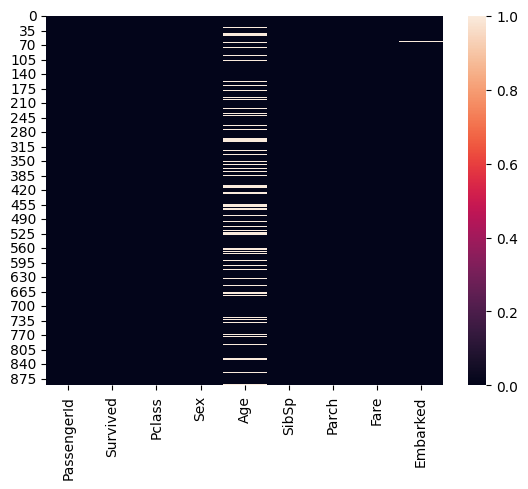

In [10]:
sns.heatmap(df.isnull()) #show where ther are missing values

Treat the missing values

<Axes: >

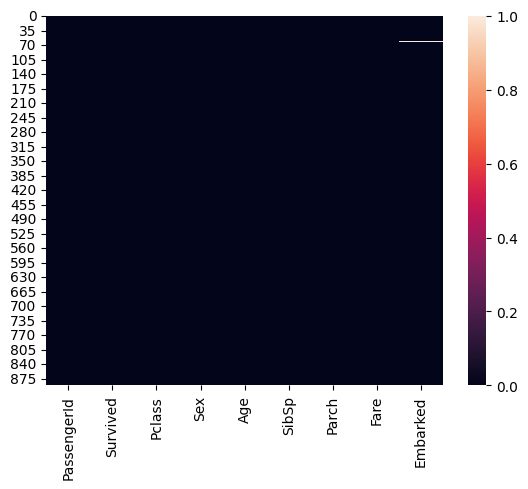

In [11]:
df['Age'] = df['Age'].interpolate()
sns.heatmap(df.isnull())

In [12]:
df =df.dropna()

<Axes: >

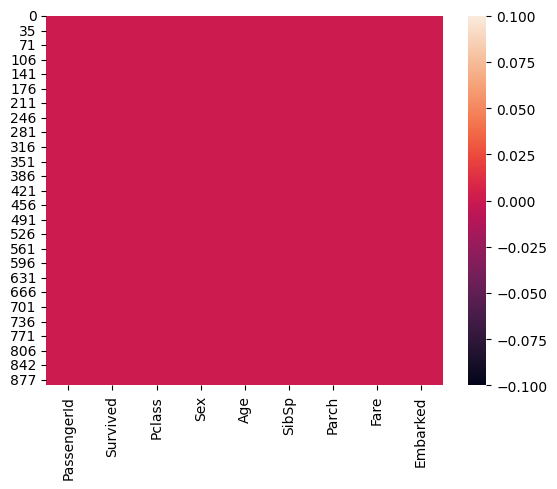

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [16]:
EmbarkedColumnDummy = pd.get_dummies(df['Embarked']) #get dummies encodes categorical variable to 1 or 0
SexColumnDummy = pd.get_dummies(df['Sex'])

In [17]:
df = pd.concat((df, EmbarkedColumnDummy,SexColumnDummy), axis=1)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [19]:
#remember to drop the redundant columns
df = df.drop(['Sex', 'Embarked'], axis = 1)

In [20]:
#seperate the dataframe into x and y
x= df.values #x has all the values
y = df['Survived'].values # this is the target variable.. the

Separating Features and Target: In many machine learning tasks, you have a dataset with features (input variables) and a target variable (the variable you want to predict or classify). By extracting values, you can separate the features (x) from the target variable (y), making it easier to feed the data into the model.

In [21]:
#delete the survived column from X
X=np.delete(x,1,axis=1)

The code X = np.delete(x, 1, axis=1) is using the NumPy library to delete a column from the NumPy array x. Let me break down the code for you:

np: This is an alias for the NumPy library, which is a powerful library for numerical and array operations in Python.

x: This is the NumPy array that contains the data from the DataFrame. Presumably, x was obtained using x = df.values, as mentioned in your earlier code.

1: This argument represents the index of the column to delete. In NumPy indexing, columns are represented by the second dimension, and indexing starts at 0. So, 1 corresponds to the second column in the array x.

axis=1: This specifies the axis along which the deletion should happen. Since we want to delete a column, we set axis=1. If you set axis=0, it would delete a row instead.

**Split the dataset**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**1. Decision tre classifier!**

In [23]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5) #The max_depth parameter is used to limit the depth of the decision tree to avoid overfitting.
dt_clf.fit(X_train, y_train) #Train the decision tree classifier using the training data X_train and y_train using the fit() method.
accuracy = dt_clf.score(X_test, y_test)#Evaluate the classifier's accuracy on the test set using the score() method. The accuracy is then stored in the variable accuracy.
print("Accuracy:", accuracy)
#

Accuracy: 0.7827715355805244


In [24]:
#The code you provided is for predicting the target values (y_pred) using
#the trained decision tree classifier (dt_clf)
#and then calculating the accuracy of the model on the test set.

y_pred=dt_clf.predict(X_test) #In this line, you are using the trained decision tree classifier (dt_clf) to make predictions on the test set (X_test). The predicted values will be stored in the variable y_pred.
dt_clf.score(X_test, y_test) #In this line, you are using the score() method of the decision tree classifier to calculate the accuracy of the model on the test set.

0.7827715355805244

In [31]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[136  21]
 [ 37  73]]


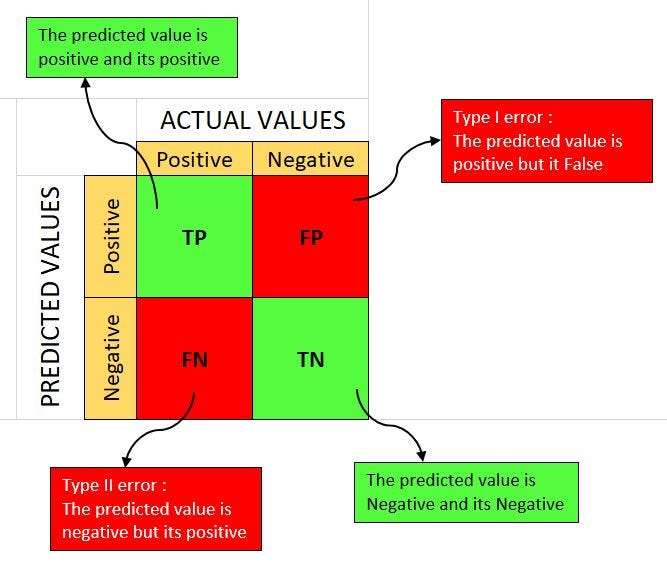

**2.Random forest classifier**

In [32]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7715355805243446

In [34]:
y_pred_2 = rf_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[133  24]
 [ 37  73]]


**3.graient boosting classifier**

In [49]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7902621722846442

In [53]:
#tune the booster with hyperparameter
gb_clf = ensemble.GradientBoostingClassifier(n_estimators = 100)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)
#no difference

0.7902621722846442

**3.Naive Bayes Classifier**

In [54]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.7602996254681648

**4.KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.6254681647940075

**5.Logistic regression classifier**
- best used for categorical data

In [62]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7640449438202247

**6.SVM**


In [67]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel ='linear')
sv_clf.fit(X_train, y_train)
sv_clf.score(X_test, y_test)

0.7715355805243446

Pr4ediction probabilities

In [70]:
r_probs = [0 for _ in range (len(y_test))]
rf_probs = rf_clf.predict_proba(X_test)
nb_probs = nb_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
lr_probs = lr_clf.predict_proba(X_test)
sv_probs = sv_clf.predict_proba(X_test)

In [72]:
rf_probs = rf_probs[:,1]
nb_probs = nb_probs[:,1]
dt_probs = dt_probs[:,1]
gb_probs = gb_probs[:,1]
knn_probs = knn_probs[:,1]
lr_probs = lr_probs[:,1]
sv_probs = sv_probs[:,1]

#**Performance of the model**

The performance of machine learning models is typically measured using various evaluation metrics, which assess how well the model is performing on the test set. The choice of evaluation metrics depends on the type of problem (classification, regression, etc.) and the specific objectives of the task. Here are some common performance metrics for different types of problems:

**1. Classification Problems:**

   - **Accuracy**: The proportion of correctly classified instances out of the total instances in the test set. It is suitable when the classes are balanced.

   - **Precision**: The proportion of true positive predictions out of all positive predictions. It is useful when the cost of false positives is high.

   - **Recall (Sensitivity/True Positive Rate)**: The proportion of true positive predictions out of all actual positive instances. It is useful when the cost of false negatives is high.

   - **F1 Score**: The harmonic mean of precision and recall. It balances precision and recall when they have significantly different values.

   - **ROC Curve (Receiver Operating Characteristic Curve)**: A graphical representation of the trade-off between true positive rate and false positive rate at various classification thresholds.

   - **AUC-ROC (Area Under the ROC Curve)**: The area under the ROC curve, which provides a single-value summary of the classifier's performance. The worst AUROC is 0.5, and the best AUROC is 1.0.

**2. Regression Problems:**

   - **Mean Absolute Error (MAE)**: The average of the absolute differences between predicted and true values.

   - **Mean Squared Error (MSE)**: The average of the squared differences between predicted and true values.

   - **Root Mean Squared Error (RMSE)**: The square root of MSE, which is useful as it is in the same unit as the target variable.

   - **R-squared (R2)**: The proportion of variance in the target variable explained by the model.

**3. Clustering Problems:**

   - **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate better-defined clusters.

**4. Time Series Forecasting:**

   - **Mean Absolute Percentage Error (MAPE)**: The mean of the absolute percentage differences between predicted and true values.

   - **Mean Squared Percentage Error (MSPE)**: The mean of the squared percentage differences between predicted and true values.

   - **Root Mean Squared Percentage Error (RMSPE)**: The square root of MSPE.

These are just a few examples of evaluation metrics. The choice of metrics may vary depending on the specific problem and business requirements. It's essential to select appropriate metrics that align with the goals of the task and to consider the context in which the model will be deployed. Additionally, using cross-validation to assess the model's performance can provide a more robust evaluation, especially when the dataset is limited.

In [74]:
#AUC-ROC
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
sv_auc = roc_auc_score(y_test, sv_probs)

In [76]:
print('random prediction : auc roc = %.3f'%(r_auc))
print('random fores prediction : auc roc = %.3f'%(rf_auc))
print('naive bayes prediction : auc roc = %.3f'%(nb_auc))
print('decision treee prediction : auc roc = %.3f'%(dt_auc))
print('gradient boost prediction : auc roc = %.3f'%(gb_auc))
print('knn prediction : auc roc = %.3f'%(knn_auc))
print('linear regression prediction : auc roc = %.3f'%(lr_auc))
print('SVM prediction : auc roc = %.3f'%(sv_auc))

random prediction : auc roc = 0.500
random fores prediction : auc roc = 0.831
naive bayes prediction : auc roc = 0.807
decision treee prediction : auc roc = 0.810
gradient boost prediction : auc roc = 0.828
knn prediction : auc roc = 0.603
linear regression prediction : auc roc = 0.829
SVM prediction : auc roc = 0.816


The main difference between regression, classification, clustering, and time series problems lies in the nature of the task and the type of output they aim to produce. Here's a brief explanation of each type:<br><br>

Regression Problem:<br>

Nature of Task: In a regression problem, the goal is to predict a continuous numerical value or a real number. The output is a continuous function, and the model aims to establish a relationship between input features and the target variable.<br>
Example: Predicting house prices, sales revenue, temperature, etc.<br><br>
Classification Problem:<br>

Nature of Task: In a classification problem, the goal is to predict which category or class an input instance belongs to. The output is a discrete class label from a predefined set of classes.<br>
Example: Predicting whether an email is spam or not, classifying images into different objects, predicting the outcome of a medical test (positive/negative).<br><br>
Clustering Problem:<br>

Nature of Task: In a clustering problem, the goal is to group similar data points into clusters based on their similarities and dissimilarities. It is an unsupervised learning task, meaning there are no predefined class labels.<br>
Example: Grouping customers based on their purchase behavior, segmenting data into distinct groups based on their characteristics.<br><br>
Time Series Problem:<br>

Nature of Task: A time series problem deals with data collected over time at regular intervals. The goal is to forecast future values based on the historical data and patterns in the time series.<br>
Example: Predicting future stock prices, forecasting demand for a product over time, predicting electricity consumption for the next month.<br>
In summary, the main differences are related to the type of output the models aim to produce:<br><br>

Regression: Predicting continuous numerical values.<br>
Classification: Assigning discrete class labels.<br>
Clustering: Grouping data points into clusters based on similarity.<br>
Time Series: Forecasting future values in a time-ordered sequence.<br>
Each type of problem requires different modeling approaches, algorithms, and evaluation metrics. The choice of the problem type depends on the nature of the data and the specific objective of the analysis or prediction task.<br>

#Conclusion

linear regression prediction with a  auc roc of 0.829